In [74]:
import random

import matplotlib.pyplot as plt
import numpy as np
import simpy

Short Queue Length Points:
Interarrival Time: 1, Service Time: 2.1337923839610284, Queue Length:1
Interarrival Time: 1, Service Time: 0.03018757118513822, Queue Length:1
Interarrival Time: 2, Service Time: 0.28893176710432233, Queue Length:1
Interarrival Time: 4, Service Time: 1.2686501197644455, Queue Length:1
Interarrival Time: 3, Service Time: 0.20803947522021737, Queue Length:1
Interarrival Time: 1, Service Time: 0.03611511972405028, Queue Length:1
Interarrival Time: 2, Service Time: 0.6540406862875361, Queue Length:1
Interarrival Time: 2, Service Time: 0.6112756974101782, Queue Length:1
Interarrival Time: 3, Service Time: 0.7401977638434344, Queue Length:1
Interarrival Time: 1, Service Time: 2.207187506334709, Queue Length:1
Interarrival Time: 1, Service Time: 0.988721794508764, Queue Length:1
Interarrival Time: 2, Service Time: 0.4330334543250579, Queue Length:1
Interarrival Time: 4, Service Time: 0.20888651504350594, Queue Length:1
Interarrival Time: 3, Service Time: 0.371977981

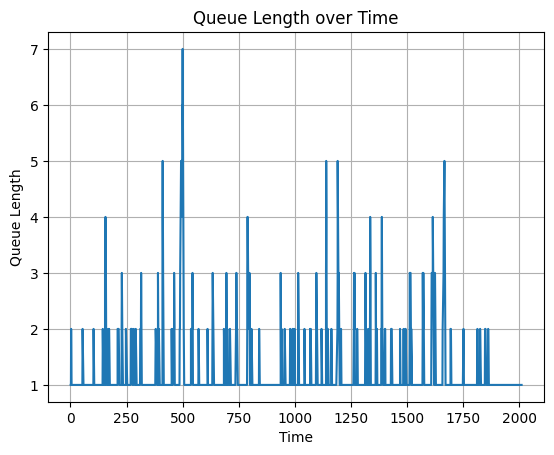

In [75]:
class KendallQueue:
    def __init__(self, env, arrival_rate, service_rate, num_customers):
        self.env = env
        self.queue = simpy.Store(env)
        self.arrival_rate = arrival_rate
        self.service_rate = service_rate
        self.num_customers = num_customers
        self.queue_lengths = []
        self.interarrival_times = []
        self.service_times = []
        self.queue_times = []

    def generate_arrivals(self):
        for i in range(self.num_customers):
            interarrival_time = np.random.poisson(1 / self.arrival_rate)
            yield self.env.timeout(interarrival_time)
            self.interarrival_times.append(interarrival_time)
            self.queue.put(self.env.now)
            self.queue_lengths.append(len(self.queue.items))
            self.queue_times.append(self.env.now)

    def serve_customers(self):
        while True:
            arrival_time = yield self.queue.get()
            service_time = np.random.exponential(1 / self.service_rate)
            self.service_times.append(service_time)
            yield self.env.timeout(service_time)

    def run_simulation(self):
        self.env.process(self.generate_arrivals())
        self.env.process(self.serve_customers())
        self.env.run()

        # Find points where queue length is short or long
        avg_queue_length = sum(self.queue_lengths) / len(self.queue_lengths)
        short_points = []
        long_points = []
        for i, length in enumerate(self.queue_lengths):
            if length < avg_queue_length:
                short_points.append(
                    (self.interarrival_times[i], self.service_times[i], self.queue_lengths[i]))
            else:
                long_points.append(
                    (self.interarrival_times[i], self.service_times[i], self.queue_lengths[i]))

        # Print information about short and long queue points
        print("Short Queue Length Points:")
        for interarrival_time, service_time, queue_length in short_points:
            print(
                f"Interarrival Time: {interarrival_time}, Service Time: {service_time}, Queue Length:{queue_length}")

        print("\nLong Queue Length Points:")
        for interarrival_time, service_time, queue_length in long_points:
            print(
                f"Interarrival Time: {interarrival_time}, Service Time: {service_time}, Queue Length:{queue_length}")


def plot_queue_length(queue_times, queue_lengths):
    plt.plot(queue_times, queue_lengths)
    plt.xlabel('Time')
    plt.ylabel('Queue Length')
    plt.title('Queue Length over Time')
    plt.grid(True)
    plt.show()


# Simulation parameters
arrival_rate = 0.5  # Average number of arrivals per unit time
service_rate = 1.0  # Average number of customers served per unit time
num_customers = 1000  # Total number of customers to simulate

# Create environment and Kendall's queue
env = simpy.Environment()
kendall_queue = KendallQueue(env, arrival_rate, service_rate, num_customers)

# Run simulation
kendall_queue.run_simulation()

# Plot queue length
plot_queue_length(kendall_queue.queue_times, kendall_queue.queue_lengths)

Short Queue Length Points:
Interarrival Time: 5, Service Time: 0.8, Queue Length: 1
Interarrival Time: 0, Service Time: 0.8, Queue Length: 1
Interarrival Time: 1, Service Time: 0.8, Queue Length: 1
Interarrival Time: 2, Service Time: 0.8, Queue Length: 1
Interarrival Time: 1, Service Time: 0.8, Queue Length: 1
Interarrival Time: 5, Service Time: 0.8, Queue Length: 1
Interarrival Time: 1, Service Time: 0.8, Queue Length: 1
Interarrival Time: 3, Service Time: 0.8, Queue Length: 1
Interarrival Time: 1, Service Time: 0.8, Queue Length: 1
Interarrival Time: 3, Service Time: 0.8, Queue Length: 1
Interarrival Time: 1, Service Time: 0.8, Queue Length: 1
Interarrival Time: 2, Service Time: 0.8, Queue Length: 1
Interarrival Time: 2, Service Time: 0.8, Queue Length: 1
Interarrival Time: 3, Service Time: 0.8, Queue Length: 1
Interarrival Time: 1, Service Time: 0.8, Queue Length: 1
Interarrival Time: 0, Service Time: 0.8, Queue Length: 1
Interarrival Time: 2, Service Time: 0.8, Queue Length: 1
Inte

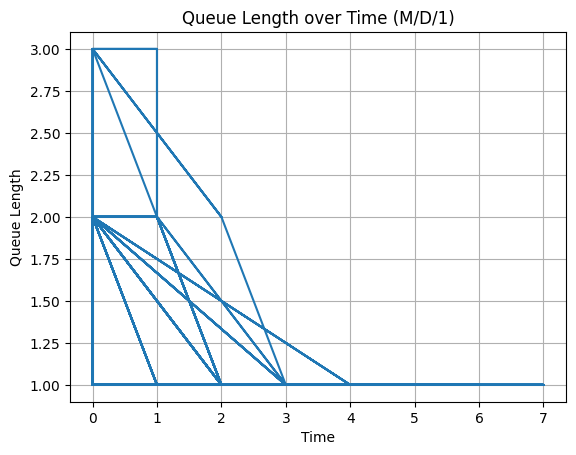

In [76]:
class KendallQueueMD1:
    def __init__(self, env, arrival_rate, service_time, num_customers):
        self.env = env
        self.queue = simpy.Store(env)
        self.arrival_rate = arrival_rate
        self.service_time = service_time
        self.num_customers = num_customers
        self.queue_lengths = []
        self.interarrival_times = []
        self.service_times = []

    def generate_arrivals(self):
        for i in range(self.num_customers):
            interarrival_time = np.random.poisson(1 / self.arrival_rate)
            yield self.env.timeout(interarrival_time)
            self.interarrival_times.append(interarrival_time)
            self.queue.put(self.env.now)
            self.queue_lengths.append(len(self.queue.items))

    def serve_customers(self):
        while True:
            arrival_time = yield self.queue.get()
            self.service_times.append(self.service_time)
            yield self.env.timeout(self.service_time)

    def run_simulation(self):
        self.env.process(self.generate_arrivals())
        self.env.process(self.serve_customers())
        self.env.run()

        # Find points where queue length is short or long
        avg_queue_length = sum(self.queue_lengths) / len(self.queue_lengths)
        short_points = []
        long_points = []
        for i, length in enumerate(self.queue_lengths):
            if length < avg_queue_length:
                short_points.append(
                    (self.interarrival_times[i], self.service_times[i], self.queue_lengths[i]))
            else:
                long_points.append(
                    (self.interarrival_times[i], self.service_times[i], self.queue_lengths[i]))

        # Print information about short and long queue points
        print("Short Queue Length Points:")
        for interarrival_time, service_time, queue_length in short_points:
            print(
                f"Interarrival Time: {interarrival_time}, Service Time: {service_time}, Queue Length: {queue_length}")

        print("\nLong Queue Length Points:")
        for interarrival_time, service_time, queue_length in long_points:
            print(
                f"Interarrival Time: {interarrival_time}, Service Time: {service_time}, Queue Length: {queue_length}")


def plot_queue_length(queue_times, queue_lengths):
    plt.plot(queue_times, queue_lengths)
    plt.xlabel('Time')
    plt.ylabel('Queue Length')
    plt.title('Queue Length over Time (M/D/1)')
    plt.grid(True)
    plt.show()


# Simulation parameters
arrival_rate = 0.5  # Average number of arrivals per unit time
service_time = 0.8  # Deterministic service time (in time units)
num_customers = 1000  # Total number of customers to simulate

# Create environment and Kendall's queue (M/D/1)
env = simpy.Environment()
kendall_queue = KendallQueueMD1(env, arrival_rate, service_time, num_customers)

# Run simulation
kendall_queue.run_simulation()

# Plot queue length
plot_queue_length(kendall_queue.interarrival_times,
                  kendall_queue.queue_lengths)